In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key
from datetime import datetime
import time

# Establish API URL for openweather API.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

644

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to th record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds, 
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate the Data Loading is complete.
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | presidencia roque saenz pena
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | raga
Processing Record 6 of Set 1 | vrangel
Processing Record 7 of Set 1 | george town
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | bundaberg
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | lorengau
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | parakou
Processing Record 15 of Set 1 | san rafael del sur
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | vanimo
Processing Record 19 of Set 1 | tidore
City not found. Skipping...
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | ka

Processing Record 37 of Set 4 | yar-sale
Processing Record 38 of Set 4 | torbay
Processing Record 39 of Set 4 | tasiilaq
Processing Record 40 of Set 4 | barrow
Processing Record 41 of Set 4 | grindavik
Processing Record 42 of Set 4 | utiroa
City not found. Skipping...
Processing Record 43 of Set 4 | sikea
City not found. Skipping...
Processing Record 44 of Set 4 | ostrovnoy
Processing Record 45 of Set 4 | aksu
Processing Record 46 of Set 4 | san quintin
Processing Record 47 of Set 4 | ixtapa
Processing Record 48 of Set 4 | amderma
City not found. Skipping...
Processing Record 49 of Set 4 | manica
Processing Record 50 of Set 4 | smithers
Processing Record 1 of Set 5 | roald
Processing Record 2 of Set 5 | sirjan
Processing Record 3 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 5 | acapulco
Processing Record 5 of Set 5 | pachino
Processing Record 6 of Set 5 | lebu
Processing Record 7 of Set 5 | sorvag
City not found. Skipping...
Processing Record 8 of Set 5 | b

Processing Record 27 of Set 8 | wattegama
Processing Record 28 of Set 8 | humaita
Processing Record 29 of Set 8 | arman
Processing Record 30 of Set 8 | at-bashi
Processing Record 31 of Set 8 | cortez
Processing Record 32 of Set 8 | bolshaya martynovka
Processing Record 33 of Set 8 | toba tek singh
Processing Record 34 of Set 8 | saint-augustin
Processing Record 35 of Set 8 | motril
Processing Record 36 of Set 8 | lasa
Processing Record 37 of Set 8 | harper
Processing Record 38 of Set 8 | gao
Processing Record 39 of Set 8 | mayor pablo lagerenza
Processing Record 40 of Set 8 | aksarka
Processing Record 41 of Set 8 | murray bridge
Processing Record 42 of Set 8 | boa vista
Processing Record 43 of Set 8 | margherita
Processing Record 44 of Set 8 | murgud
Processing Record 45 of Set 8 | khorramshahr
Processing Record 46 of Set 8 | kieta
Processing Record 47 of Set 8 | sibolga
Processing Record 48 of Set 8 | tongren
Processing Record 49 of Set 8 | conceicao da barra
Processing Record 50 of S

Processing Record 17 of Set 12 | kalianget
Processing Record 18 of Set 12 | rock springs
Processing Record 19 of Set 12 | koslan
Processing Record 20 of Set 12 | ukiah
Processing Record 21 of Set 12 | talnakh
Processing Record 22 of Set 12 | dongsheng
Processing Record 23 of Set 12 | gat
Processing Record 24 of Set 12 | falam
Processing Record 25 of Set 12 | jalingo
Processing Record 26 of Set 12 | sur
Processing Record 27 of Set 12 | avera
Processing Record 28 of Set 12 | peniche
Processing Record 29 of Set 12 | vedaranniyam
City not found. Skipping...
Processing Record 30 of Set 12 | hun
Processing Record 31 of Set 12 | alto araguaia
Processing Record 32 of Set 12 | karamay
City not found. Skipping...
Processing Record 33 of Set 12 | nizhniy odes
Processing Record 34 of Set 12 | whitehorse
Processing Record 35 of Set 12 | werda
Processing Record 36 of Set 12 | shelburne
Processing Record 37 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 38 of Set 12 | puerto pina

In [6]:
len(city_data)

596

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,62.01,90,43,4.00,ZA,2020-10-24 23:29:46
1,Carnarvon,-24.87,113.63,71.60,94,90,16.11,AU,2020-10-24 23:32:59
2,Presidencia Roque Saenz Pena,-26.79,-60.44,81.12,58,6,6.98,AR,2020-10-24 23:32:59
3,Ushuaia,-54.80,-68.30,46.40,61,75,5.82,AR,2020-10-24 23:28:37
4,Raga,8.46,25.68,72.36,87,58,2.59,SS,2020-10-24 23:33:00


In [8]:
# Reorder the columns of the DataFrame.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2020-10-24 23:29:46,-34.42,19.23,62.01,90,43,4.00
1,Carnarvon,AU,2020-10-24 23:32:59,-24.87,113.63,71.60,94,90,16.11
2,Presidencia Roque Saenz Pena,AR,2020-10-24 23:32:59,-26.79,-60.44,81.12,58,6,6.98
3,Ushuaia,AR,2020-10-24 23:28:37,-54.80,-68.30,46.40,61,75,5.82
4,Raga,SS,2020-10-24 23:33:00,8.46,25.68,72.36,87,58,2.59


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

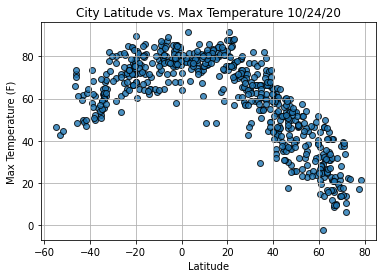

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

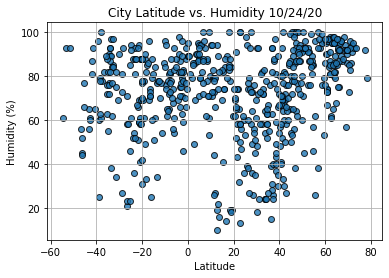

In [21]:
# Build the scatter plot for  vs. max temperature.
plt.scatter(lats,
            humidity, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

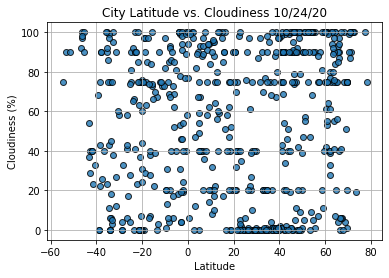

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

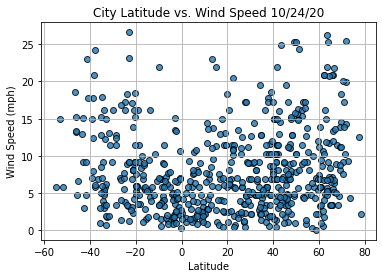

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()